In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/material.csv
/kaggle/input/Decision Tree.py
/kaggle/input/Data.csv
/kaggle/input/decision_tree.png


# Step 1. Explore the dataset

*  Use Python and libraries like Pandas to load the dataset into a DataFrame.
*  Look at the first few rows, check the column names, and get a basic understanding of the data structure.

In [2]:
import pandas as pd

data = pd.read_csv('/kaggle/input/material.csv')

# Display the first few rows of the dataset
print(data.head())
# [ultimate_tensile_strength, yield_strength, Elastic_Modulus, Sheer_Modulus, Poisson's Ratio, Density]
#features = ['Su', 'Sy', 'E', 'G', 'mu', 'Ro']

                         Material   Su   Sy       E      G   mu    Ro   Use
0   ANSI Steel SAE 1015 as-rolled  421  314  207000  79000  0.3  7860  True
1  ANSI Steel SAE 1015 normalized  424  324  207000  79000  0.3  7860  True
2    ANSI Steel SAE 1015 annealed  386  284  207000  79000  0.3  7860  True
3   ANSI Steel SAE 1020 as-rolled  448  331  207000  79000  0.3  7860  True
4  ANSI Steel SAE 1020 normalized  441  346  207000  79000  0.3  7860  True


# Step 2: Data Cleaning and Preprocessing
Before you can analyze or model the data, it’s important to clean and preprocess it. Here are the tasks you should focus on:
* Identify and handle any missing values in the dataset.
* Ensure that each column has the correct data type (e.g., numerical, categorical).
* Check for and remove any duplicate rows.
* If necessary, normalize or standardize the numerical data to ensure consistency.

In [3]:
# Check for missing values
print(data.isnull().sum())

Material    0
Su          0
Sy          0
E           0
G           0
mu          0
Ro          0
Use         0
dtype: int64


In [4]:
# Discard rows where label 'Use' is missing
data = data.dropna(subset=['Use'])

# Fill missing values in the numerical columns (assuming they are in between)
numerical_columns = data.columns[1:-1]
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Display the cleaned data
print(data.head())

                         Material   Su   Sy       E      G   mu    Ro   Use
0   ANSI Steel SAE 1015 as-rolled  421  314  207000  79000  0.3  7860  True
1  ANSI Steel SAE 1015 normalized  424  324  207000  79000  0.3  7860  True
2    ANSI Steel SAE 1015 annealed  386  284  207000  79000  0.3  7860  True
3   ANSI Steel SAE 1020 as-rolled  448  331  207000  79000  0.3  7860  True
4  ANSI Steel SAE 1020 normalized  441  346  207000  79000  0.3  7860  True


In [5]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Step 3: Exploratory Data Analysis
understand the underlying patterns, relationships, and distributions in your data. Some options are:

* Summary Statistics: Get a quick overview of your data.
* Visualizations: Use plots to visualize distributions and relationships.
* Correlation Analysis: Identify relationships between features.

In [6]:
# Summary statistics
print(data.describe())

# Summary of categorical columns
print(data['Material'].value_counts())
print(data['Use'].value_counts())

                Su           Sy              E              G           mu  \
count  1548.000000  1548.000000    1548.000000    1548.000000  1548.000000   
mean    572.618217   387.105943  164464.470284   85613.307494     0.302984   
std     327.214677   289.794398   56168.339682  125488.397355     0.024621   
min      69.000000    28.000000   73000.000000   26000.000000     0.200000   
25%     340.000000   205.000000  105000.000000   40000.000000     0.300000   
50%     500.000000   305.000000  206000.000000   79000.000000     0.300000   
75%     705.000000   470.000000  206000.000000   80000.000000     0.320000   
max    2220.000000  2048.000000  219000.000000  769000.000000     0.350000   

                Ro  
count  1548.000000  
mean   6927.439922  
std    2117.374925  
min    1750.000000  
25%    7160.000000  
50%    7860.000000  
75%    7860.000000  
max    8930.000000  
Material
JIS Grey cast iron                       5
ISO Grey cast iron                       5
BS Grey cast 

# Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


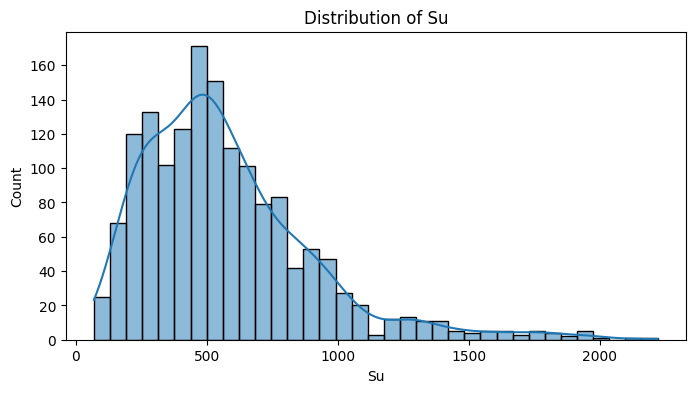

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


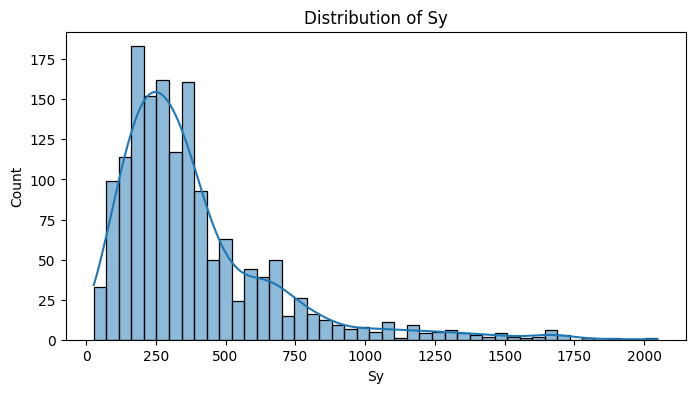

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


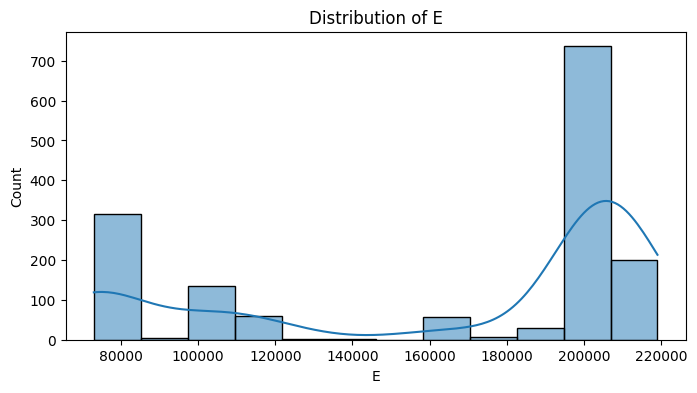

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


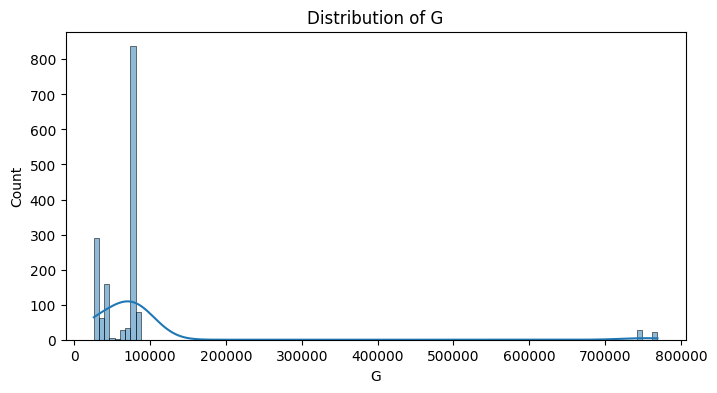

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


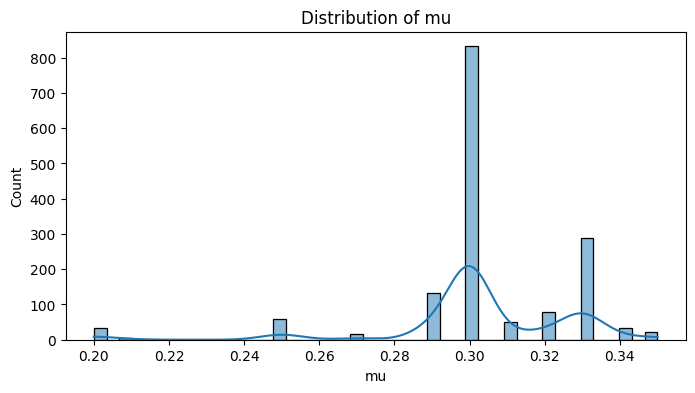

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


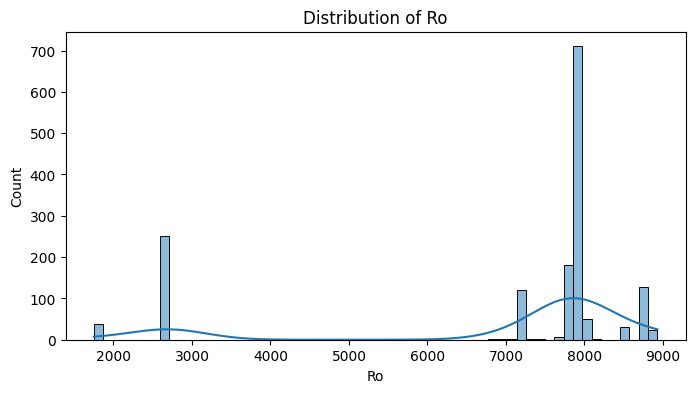

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


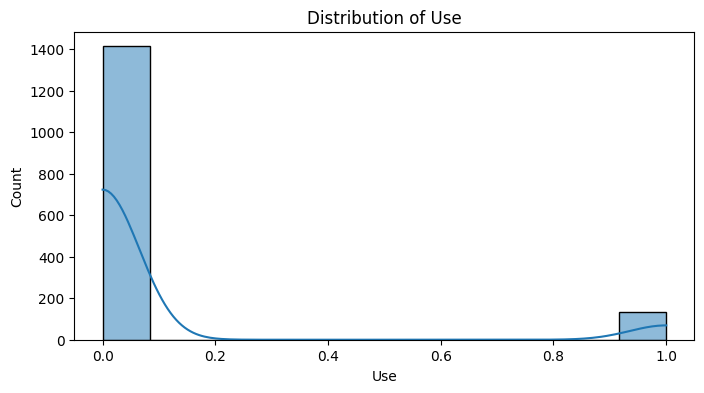

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
numerical_columns = data.columns[1:]
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
    
# [ultimate_tensile_strength, yield_strength, Elastic_Modulus, Sheer_Modulus, Poisson's Ratio, Density]
#features = ['Su', 'Sy', 'E', 'G', 'mu', 'Ro']

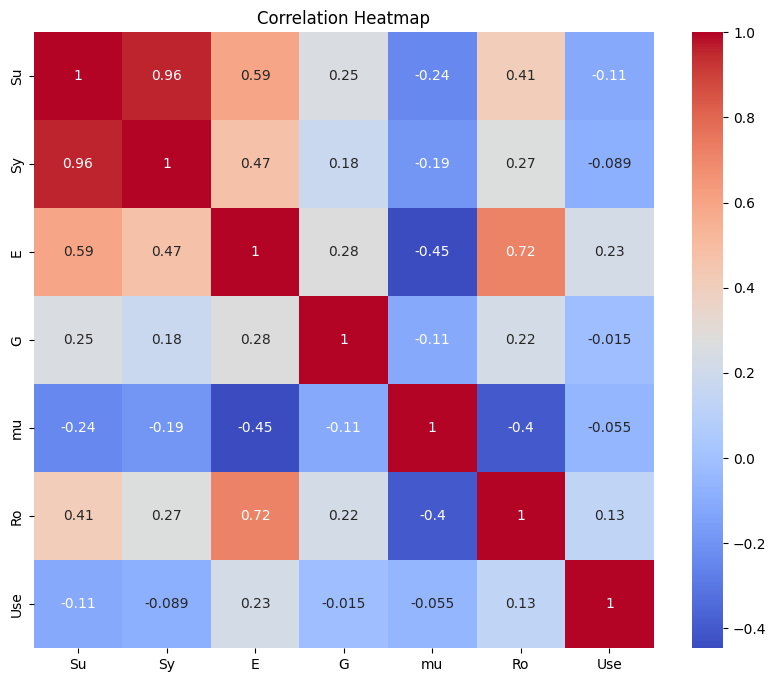

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Feature Selection and Engineering

Before moving on to Machine learning, it's important to identify the relevant features that will be most useful for your model. The 2 key tasks here are 
1. **Feature Selection**: Identify the most relevant features for your machine learning task.
2. **Feature Engineering**: Create new features that might be useful for the model.

In [9]:
# Option 1. Use Data Corelation
# [ultimate_tensile_strength, yield_strength, Elastic_Modulus, Sheer_Modulus, Poisson's Ratio, Density]
#features = ['Su', 'Sy', 'E', 'G', 'mu', 'Ro']

# Correlation matrix to identify relevant features
correlation_matrix = data[numerical_columns].corr()
print(correlation_matrix)
print()
print(correlation_matrix['Use'].sort_values(ascending=False))

           Su        Sy         E         G        mu        Ro       Use
Su   1.000000  0.957355  0.594539  0.254560 -0.239649  0.407968 -0.108608
Sy   0.957355  1.000000  0.473113  0.179317 -0.190340  0.274133 -0.089184
E    0.594539  0.473113  1.000000  0.279714 -0.446784  0.716698  0.225466
G    0.254560  0.179317  0.279714  1.000000 -0.108715  0.222955 -0.014871
mu  -0.239649 -0.190340 -0.446784 -0.108715  1.000000 -0.400145 -0.055154
Ro   0.407968  0.274133  0.716698  0.222955 -0.400145  1.000000  0.132557
Use -0.108608 -0.089184  0.225466 -0.014871 -0.055154  0.132557  1.000000

Use    1.000000
E      0.225466
Ro     0.132557
G     -0.014871
mu    -0.055154
Sy    -0.089184
Su    -0.108608
Name: Use, dtype: float64


In [10]:
# Option 2. Statistical tests like Chi-Square, Anova, etc 
X = data[numerical_columns]
y = data['Use']



#ANOVA test
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X, y)
f_df = pd.DataFrame({'Feature': X.columns, 'F Score': f_scores, 'p-value': p_values})
print(f_df)
print()


from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Assuming X is your feature matrix and y is your target vector
chi2_scores, p_values = chi2(X, y)
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values})
print(chi2_df)

  Feature    F Score       p-value
0      Su  18.453858  1.849161e-05
1      Sy  12.395149  4.429434e-04
2       E  82.799743  2.718345e-19
3       G   0.341981  5.587736e-01
4      mu   4.717209  3.001375e-02
5      Ro  27.651148  1.656085e-07
6     Use        inf  0.000000e+00

  Feature    Chi2 Score        p-value
0      Su  3.412048e+03   0.000000e+00
1      Sy  2.669406e+03   0.000000e+00
2       E  1.508560e+06   0.000000e+00
3       G  6.292918e+04   0.000000e+00
4      mu  9.415594e-03   9.226994e-01
5      Ro  1.759210e+04   0.000000e+00
6     Use  1.413000e+03  3.144204e-309


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


# Feature Engineering

In [11]:
# [ultimate_tensile_strength, yield_strength, Elastic_Modulus, Sheer_Modulus, Poisson's Ratio, Density]
#features = ['Su', 'Sy', 'E', 'G', 'mu', 'Ro']

# Example: Creating a new feature from existing data
data['Strength_to_Weight'] = data['Su'] / data['Ro']

numerical_columns = data.columns[1:]
correlation_matrix = data[numerical_columns].corr()
print(correlation_matrix['Use'].sort_values(ascending=False))

Use                   1.000000
E                     0.225466
Ro                    0.132557
G                    -0.014871
mu                   -0.055154
Sy                   -0.089184
Su                   -0.108608
Strength_to_Weight   -0.198316
Name: Use, dtype: float64


In [12]:
#[ultimate_tensile_strength, yield_strength, Elastic_Modulus, Sheer_Modulus, Poisson's Ratio, Density]
features = ['Su', 'Sy', 'E', 'G', 'mu', 'Ro']

# Example: Creating a new feature from existing data
data['Strength_to_Weight'] = data['Su'] / data['Ro']

# Elastic Modulus to Density Ratio
data['E_to_Ro'] = data['E'] / data['Ro']

# Yield Strength to Density Ratio
data['Sy_to_Ro'] = data['Sy'] / data['Ro']

# Combined Modulus
data['Combined_Modulus'] = data['E'] + data['G']

numerical_columns = data.columns[1:]
correlation_matrix = data[numerical_columns].corr()
print(correlation_matrix['Use'].sort_values(ascending=False))

Use                   1.000000
E                     0.225466
Ro                    0.132557
E_to_Ro               0.091626
Combined_Modulus      0.071440
G                    -0.014871
mu                   -0.055154
Sy                   -0.089184
Su                   -0.108608
Sy_to_Ro             -0.157194
Strength_to_Weight   -0.198316
Name: Use, dtype: float64


# Step 5: Split the Data
Split your data into training and testing sets to evaluate your model’s performance.

In [13]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('/kaggle/input/material.csv')

numerical_columns = data.columns[1:-1]
# Define features and target
X = data[numerical_columns]
y = data['Use']

print(X.columns)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Su', 'Sy', 'E', 'G', 'mu', 'Ro'], dtype='object')


# Step 6: Choose a Machine Learning Model
Select a machine learning model based on your task. For example, if you’re performing classification, you might choose a logistic regression, decision tree, or random forest.

Select the model. Fit the training data to the model

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

LogisticRegression()

# Evaluate the model

Use model.predict() function to test the model on the test data

sklearn provides various evaluation metrics to evaluate the performance of the model

In [15]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)   # (ground truth label, predicted label)
logistic_precision = precision_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'Logistic Regression Precision: {logistic_precision}')
report = classification_report(y_test, logistic_predictions)
conf_matr = confusion_matrix(y_test, logistic_predictions)
print(f'\nClassification Report:\n{report}')
print(f"\nConfusion Matrix\n{conf_matr}")

Logistic Regression Accuracy: 0.8778135048231511
Logistic Regression Precision: 0.0


NameError: name 'classification_report' is not defined

In [ ]:
# Use class weights to deal with poor performance resulting from class imbalance
class_weights = {0: 1.07, 1: 15.0}
logistic_model = LogisticRegression(class_weight=class_weights)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# MODEL EVALUATION
logistic_accuracy = accuracy_score(y_test, logistic_predictions)   # (ground truth label, predicted label)
logistic_precision = precision_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'Logistic Regression Precision: {logistic_precision}')
report = classification_report(y_test, logistic_predictions)
conf_matr = confusion_matrix(y_test, logistic_predictions)
print(f'\nClassification Report:\n{report}')
print(f"\nConfusion Matrix\n{conf_matr}")

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
tree_predictions = tree_model.predict(X_test)

# Evaluate the model
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f'Decision Tree Accuracy: {tree_accuracy}')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Plot the tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(tree_model, filled=False, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded=True)

# Show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)    

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Predict the 'use' of a new data

Prepare the data. Any transformation done on training data must also be done on new_data

Predict the 'use' of new_data using model.predict() function

In [ ]:
import pandas as pd

# New instance data
new_instance = pd.DataFrame({
    'Su': [425],
    'Sy': [314],
    'E': [100000],
    'G': [80000],
    'mu': [0.3],
    'Ro': [7860]
})

# Make the prediction
prediction = model.predict(new_instance)

# Output the prediction
print(f'The predicted usage for the new instance is: {prediction}')


# Identifying the most Influential Features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
print(importances)

# Plotting Feature Importance

In [ ]:
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Get coefficients
coefficients = logistic_model.coef_[0]

#PLOT INFLUENCE OF FEATURES
feature_names = X_train.columns

# Create a DataFrame for visualization
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.gca().invert_yaxis()
plt.show()


# Neural Networks

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
print(data.head())

In [ ]:
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

In [ ]:
history = model.fit(Xs_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

loss, accuracy = model.evaluate(Xs_test, y_test)
print("Accuracy ", accuracy)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()